In [ ]:
import pandas as pd

# Load your datasets
sales_data = pd.read_csv('/content/Pizza_Sale - pizza_sales.csv')  # Replace with your sales data path
ingredients_data = pd.read_csv('/content/Pizza_ingredients - Pizza_ingredients.csv')  # Replace with your ingredients data path

In [ ]:
# Display basic information about the dataset
print(sales_data.info())
print(sales_data.describe())
print(sales_data.shape)  # (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48613.000000


In [ ]:
# Check the data types of each column
print(sales_data.dtypes)

# Check for categorical vs continuous variables
categorical_cols = sales_data.select_dtypes(include=['object']).columns
continuous_cols = sales_data.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object
Categorical Columns: Index(['pizza_name_id', 'order_date', 'order_time', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')
Continuous Columns: Index(['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price'], dtype='object')


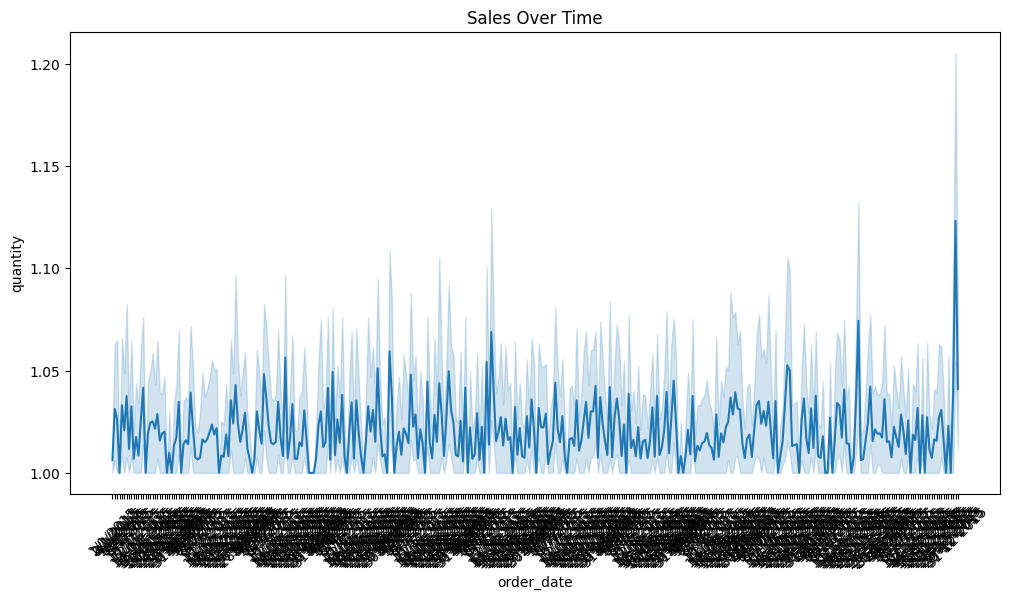

In [ ]:
# Visualize relationships between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='order_date', y='quantity')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()

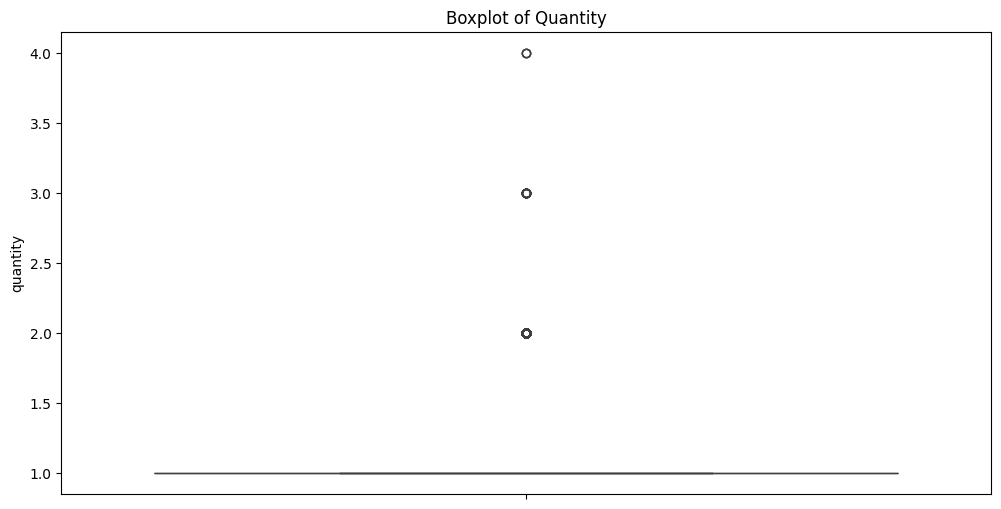

In [ ]:
# Boxplot to identify outliers in quantity sold
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data, y='quantity')
plt.title('Boxplot of Quantity')
plt.show()

In [ ]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 pizza_name_id        16
total_price           7
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [ ]:
# Check for duplicates
duplicates = sales_data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
# Check the data types of each column
print(sales_data.dtypes)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


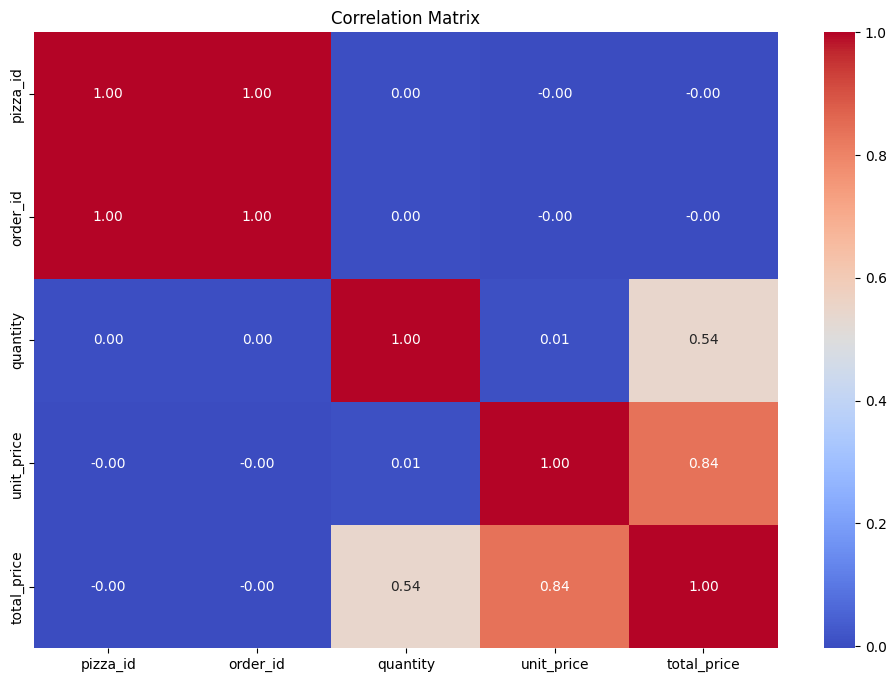

In [ ]:
# Select only numeric columns for correlation
numeric_columns = sales_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = sales_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

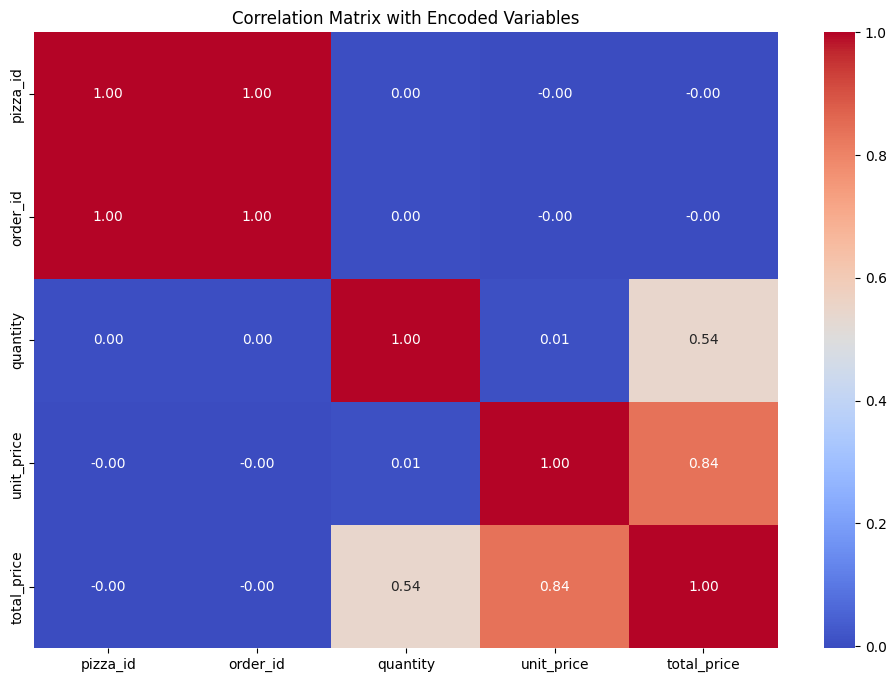

In [ ]:
# One-hot encode categorical variables
sales_data_encoded = pd.get_dummies(sales_data, columns=['pizza_name'], drop_first=True)

# Now you can calculate the correlation matrix again
numeric_columns_encoded = sales_data_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_encoded = sales_data_encoded[numeric_columns_encoded].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Variables')
plt.show()

In [ ]:
# Convert the order_date column to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Check for any NaT values that may have resulted from invalid date formats
print("Number of NaT values in order_date:", sales_data['order_date'].isnull().sum())

Number of NaT values in order_date: 29033


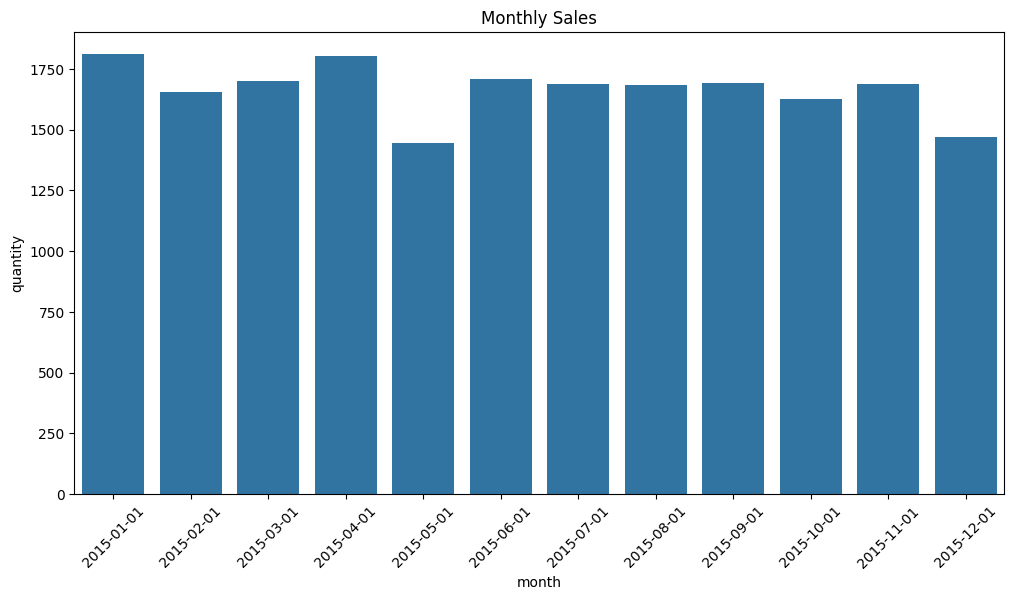

In [ ]:
# Extract the month from the order_date
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Group by month and sum the quantity sold
monthly_sales = sales_data.groupby('month')['quantity'].sum().reset_index()

# Convert the month back to a timestamp for plotting
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='quantity')  # Ensure you use the correct column name
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(sales_data.columns)

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month'],
      dtype='object')


In [ ]:
import pandas as pd

# Example DataFrame creation
data = {
    'order_date': ['2023-01-15', '2023-01-20', '2023-02-10', '2023-02-15', '2023-03-05'],
    'quantity_sold': [10, 15, 20, 25, 30]
}
sales_data = pd.DataFrame(data)

# Convert the order_date column to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Create the month column as a Period
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Display the DataFrame to verify the new column
print(sales_data)

  order_date  quantity_sold    month
0 2023-01-15             10  2023-01
1 2023-01-20             15  2023-01
2 2023-02-10             20  2023-02
3 2023-02-15             25  2023-02
4 2023-03-05             30  2023-03


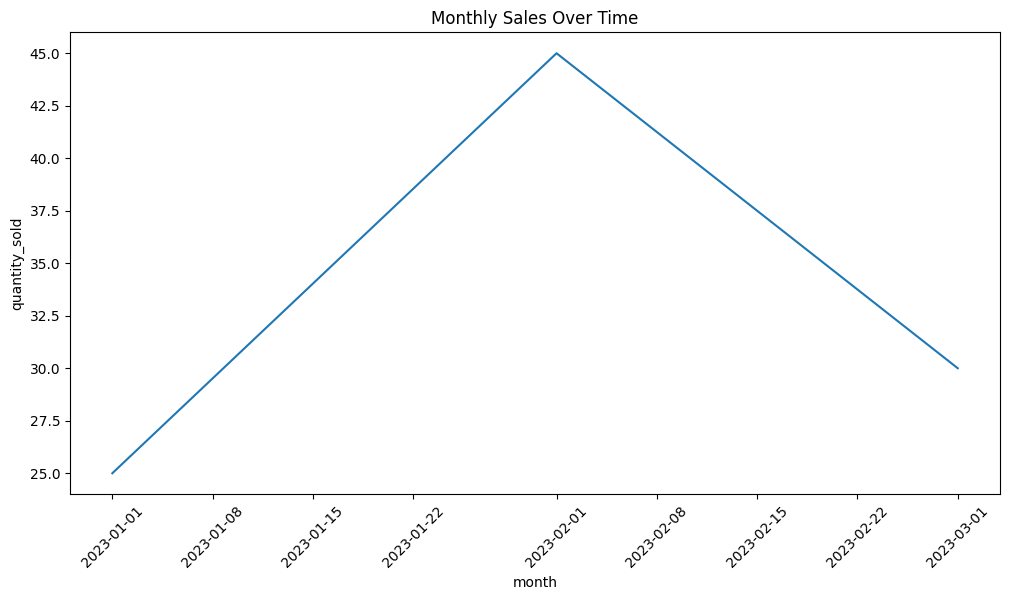

In [ ]:
# Convert the order_date column to datetime format if not already done
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Create the month column as a Period
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Group by month and sum the quantity sold
monthly_sales = sales_data.groupby('month')['quantity_sold'].sum().reset_index()

# Convert the month back to a timestamp for plotting
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()  # This should work now

# Plot the monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='quantity_sold')  # Ensure you use the correct column name
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Measure variability
print("Standard Deviation of Quantity Sold:", sales_data['quantity_sold'].std())

Standard Deviation of Quantity Sold: 7.905694150420948


In [ ]:
# Check for discrepancies
# Check if any sales are negative
negative_sales = sales_data[sales_data['quantity_sold'] < 0]
print("Negative Sales Records:\n", negative_sales)

Negative Sales Records:
 Empty DataFrame
Columns: [order_date, quantity_sold, month]
Index: []


In [ ]:
# Investigate unexpected results
# Example: Check for unusually high sales
high_sales = sales_data[sales_data['quantity_sold'] > sales_data['quantity_sold'].mean() + 3 * sales_data['quantity_sold'].std()]
print("High Sales Records:\n", high_sales)

High Sales Records:
 Empty DataFrame
Columns: [order_date, quantity_sold, month]
Index: []


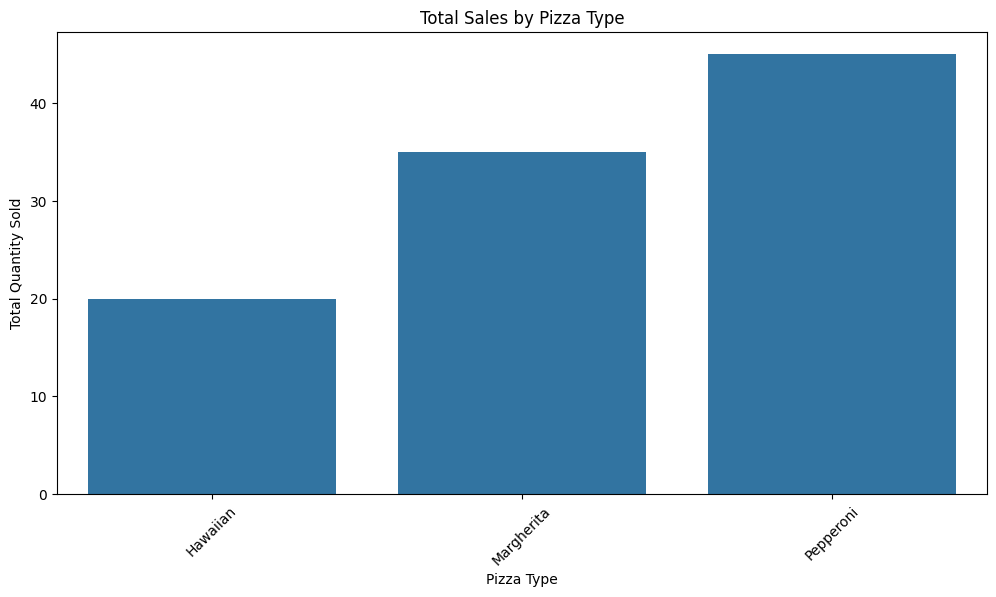

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration
data = {
    'pizza_name': ['Margherita', 'Pepperoni', 'Hawaiian', 'Margherita', 'Pepperoni'],
    'quantity': [10, 15, 20, 25, 30]
}
sales_data = pd.DataFrame(data)

# Group by pizza name and sum the quantity sold
sales_by_type = sales_data.groupby('pizza_name')['quantity'].sum().reset_index()

# Plotting the sales by pizza type
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_type, x='pizza_name', y='quantity')
plt.title('Total Sales by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

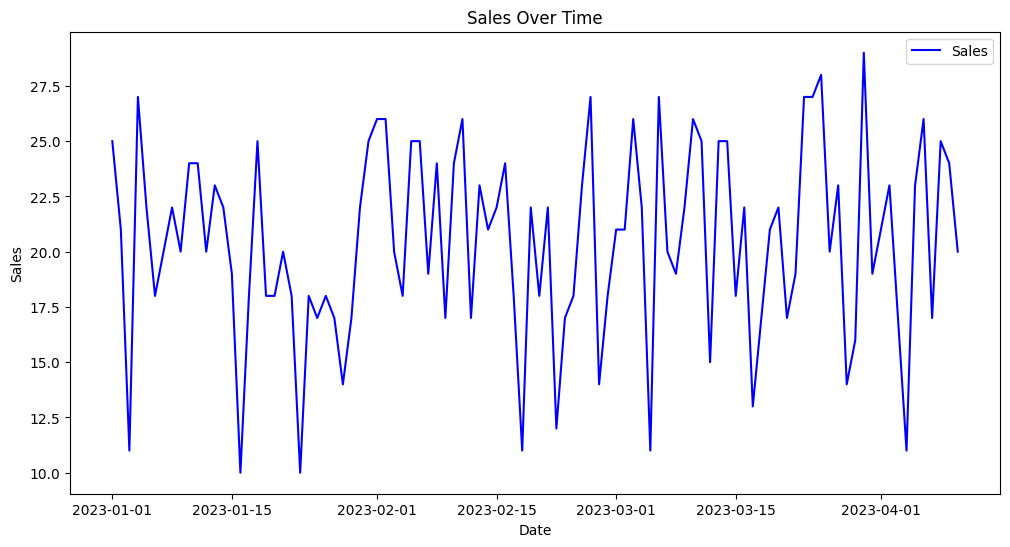

<Figure size 1200x600 with 0 Axes>

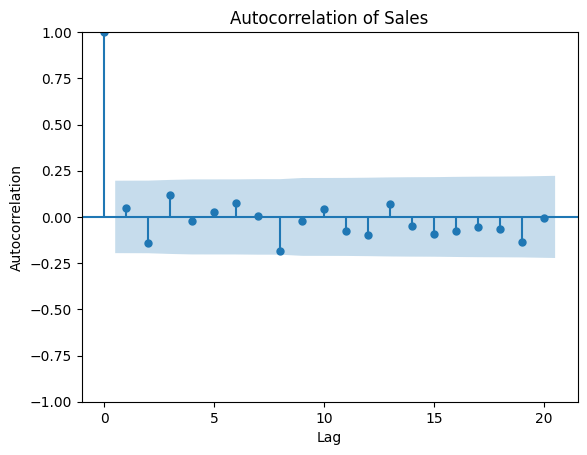

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Sample time series data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': np.random.poisson(lam=20, size=100)  # Simulated sales data
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate and plot autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(sales_data['sales'], lags=20)
plt.title('Autocorrelation of Sales')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

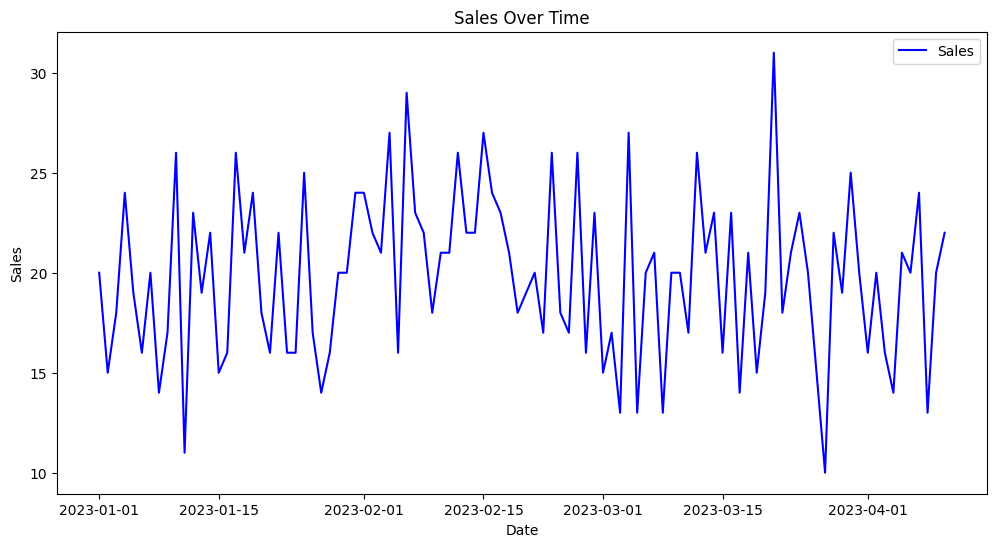

<Figure size 1200x600 with 0 Axes>

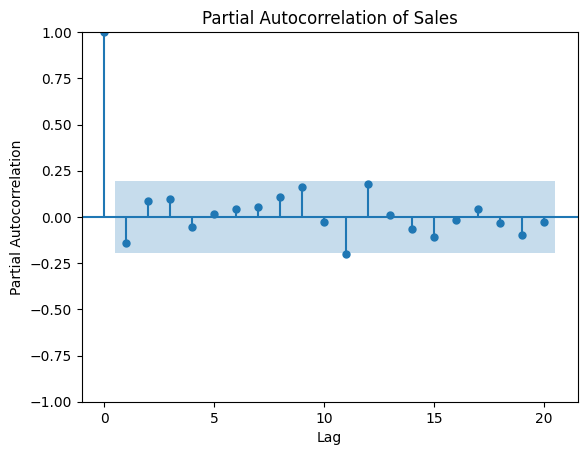

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Sample time series data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': np.random.poisson(lam=20, size=100)  # Simulated sales data
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate and plot partial autocorrelation
plt.figure(figsize=(12, 6))
plot_pacf(sales_data['sales'], lags=20)
plt.title('Partial Autocorrelation of Sales')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

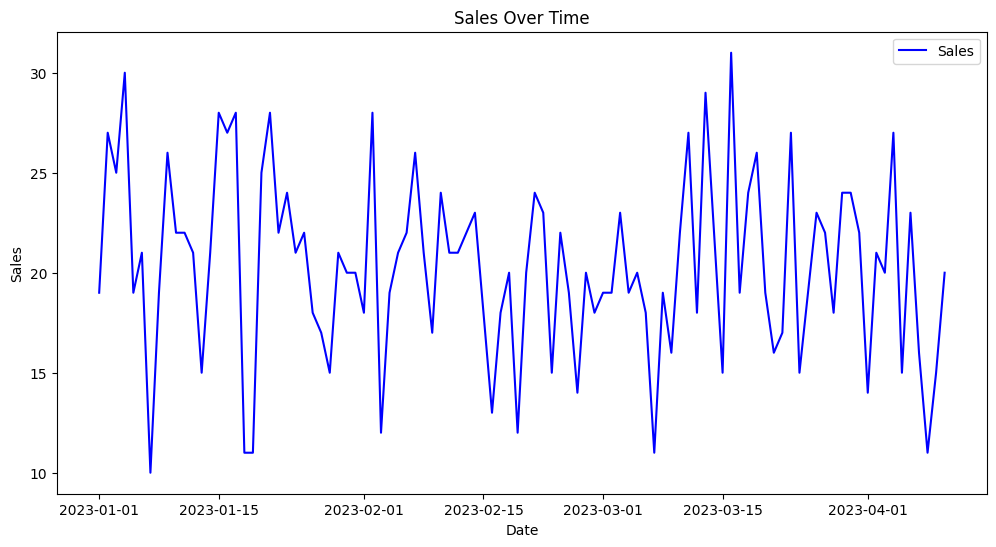

ADF Statistic: -9.299490502860655
p-value: 1.122493362700322e-15
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Sample time series data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': np.random.poisson(lam=20, size=100)  # Simulated sales data
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(sales_data['sales'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Sample sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),
    'pizza_name': ['Barbeque Chicken Pizza'] * 120,
    'quantity_sold': np.random.poisson(lam=20, size=120) + np.linspace(0, 10, 120)  # Simulated sales data with trend
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Filter data for Barbeque Chicken Pizza
bbq_chicken_sales = sales_data[sales_data['pizza_name'] == 'Barbeque Chicken Pizza']

<ipython-input-64-0da1d65f311f>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),


In [ ]:
# Fit the ARIMA model (example parameters: p=1, d=1, q=1)
model = ARIMA(bbq_chicken_sales['quantity_sold'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          quantity_sold   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -359.373
Date:                Mon, 23 Dec 2024   AIC                            724.746
Time:                        18:56:46   BIC                            733.084
Sample:                    01-31-2020   HQIC                           728.132
                         - 12-31-2029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0261      0.123     -0.212      0.832      -0.267       0.215
ma.L1         -0.8532      0.053    -16.122      0.000      -0.957      -0.749
sigma2        24.3055      2.598      9.354      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecasting the next 12 periods (months)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Combine actual and forecasted values for visualization
forecast_index = pd.date_range(start=bbq_chicken_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Combine actual and forecasted data for plotting
combined_data = pd.concat([bbq_chicken_sales['quantity_sold'], forecast_series])

<ipython-input-66-8deb13b91c71>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=bbq_chicken_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


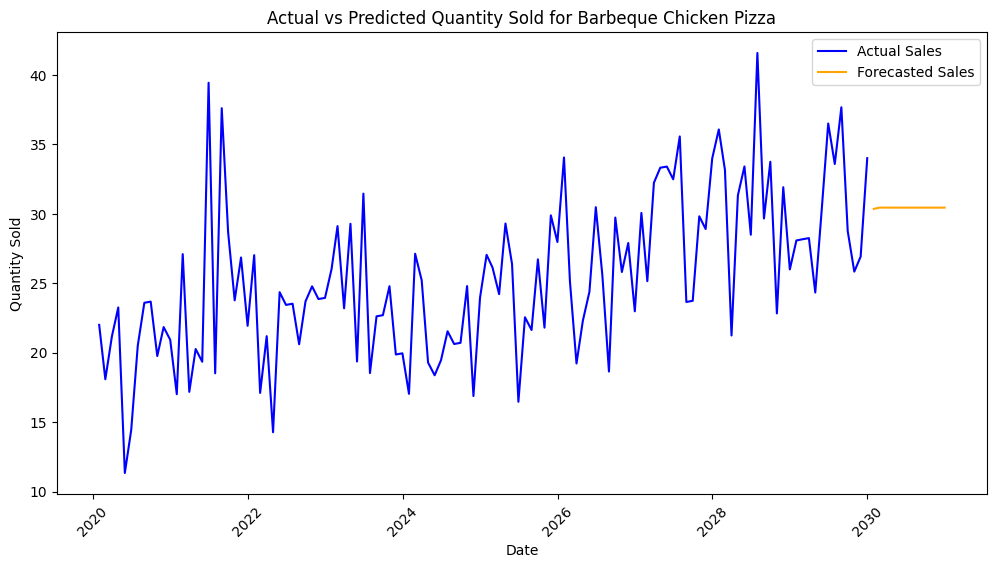

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(bbq_chicken_sales.index, bbq_chicken_sales['quantity_sold'], label='Actual Sales', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales', color='orange')
plt.title('Actual vs Predicted Quantity Sold for Barbeque Chicken Pizza')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Sample sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),
    'pizza_name': ['Barbeque Chicken Pizza'] * 120,
    'quantity_sold': np.random.poisson(lam=20, size=120) + np.linspace(0, 10, 120)  # Simulated sales data with trend
}
sales_data = pd.DataFrame(data)
sales_data.set_index('date', inplace=True)

# Filter data for Barbeque Chicken Pizza
bbq_chicken_sales = sales_data[sales_data['pizza_name'] == 'Barbeque Chicken Pizza']

<ipython-input-60-9731cb9d3d4d>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),


In [ ]:
# Fit the SARIMAX model (example parameters: p=1, d=1, q=1, P=1, D=1, Q=1, s=12)
model = SARIMAX(bbq_chicken_sales['quantity_sold'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                      quantity_sold   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -322.190
Date:                            Mon, 23 Dec 2024   AIC                            654.380
Time:                                    18:51:33   BIC                            667.744
Sample:                                01-31-2020   HQIC                           659.798
                                     - 12-31-2029                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0501      0.116     -0.430      0.667      -0.278       0.178
ma.L1         -0.9996      4.206   

In [ ]:
# Forecasting the next 12 periods (months)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Combine actual and forecasted values for visualization
forecast_index = pd.date_range(start=bbq_chicken_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Combine actual and forecasted data for plotting
combined_data = pd.concat([bbq_chicken_sales['quantity_sold'], forecast_series])

<ipython-input-62-8deb13b91c71>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=bbq_chicken_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


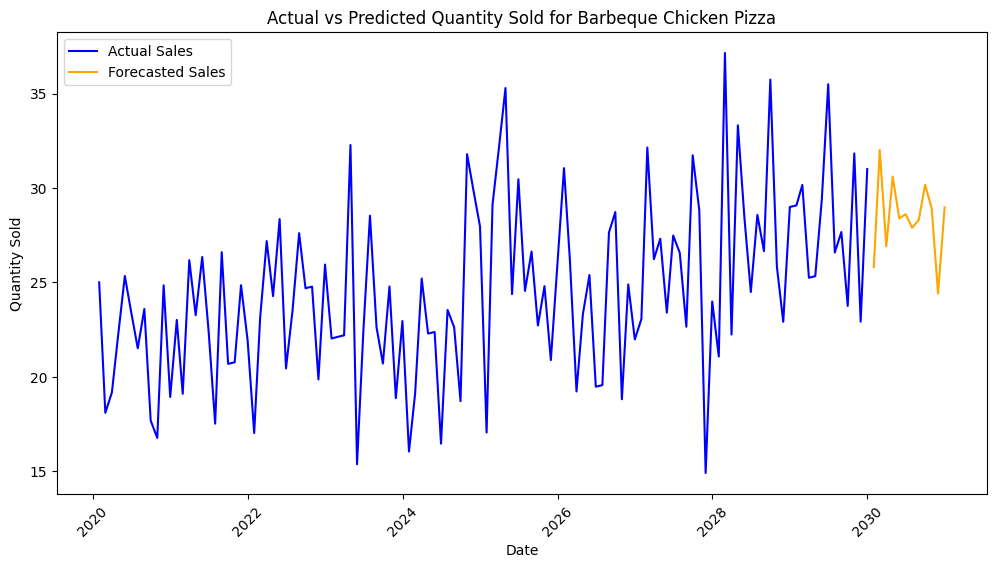

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(bbq_chicken_sales.index, bbq_chicken_sales['quantity_sold'], label='Actual Sales', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales', color='orange')
plt.title('Actual vs Predicted Quantity Sold for Barbeque Chicken Pizza')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Sample sales data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),
    'pizza_name': ['Barbeque Chicken Pizza'] * 120,
    'quantity_sold': np.random.poisson(lam=20, size=120) + np.linspace(0, 10, 120)  # Simulated sales data with trend
}
sales_data = pd.DataFrame(data)

# Filter data for Barbeque Chicken Pizza
bbq_chicken_sales = sales_data[sales_data['pizza_name'] == 'Barbeque Chicken Pizza']

# Prepare the data for Prophet
bbq_chicken_sales = bbq_chicken_sales.rename(columns={'date': 'ds', 'quantity_sold': 'y'})

<ipython-input-68-49dff634e06e>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2020-01-01', periods=120, freq='M'),


In [ ]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(bbq_chicken_sales)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdue4b_td/l71xwskk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdue4b_td/10r4cfvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56306', 'data', 'file=/tmp/tmpdue4b_td/l71xwskk.json', 'init=/tmp/tmpdue4b_td/10r4cfvv.json', 'output', 'file=/tmp/tmpdue4b_td/prophet_model5z79u6ds/prophet_model-20241223190225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:02:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:02:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast the next 12 months

# Make predictions
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


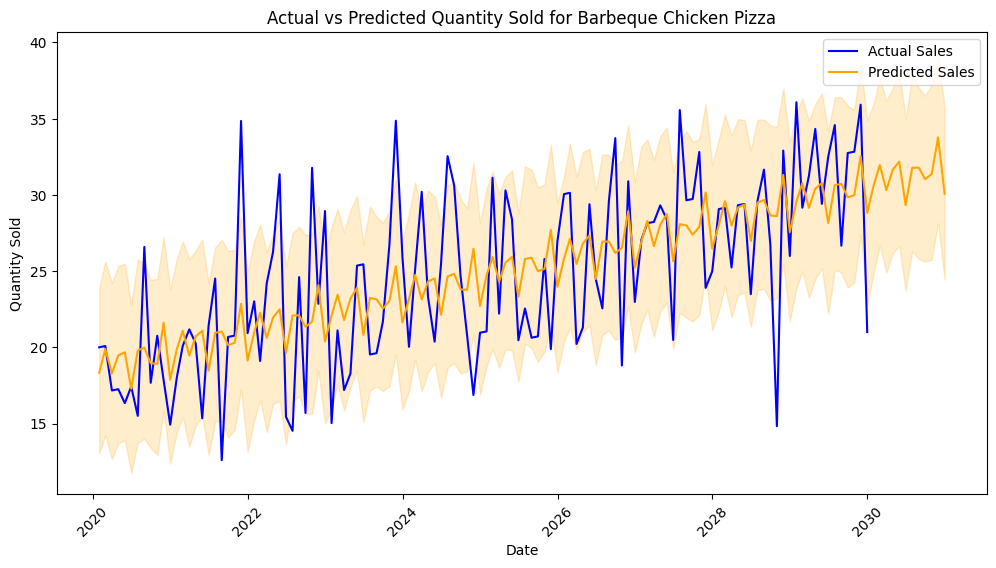

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(bbq_chicken_sales['ds'], bbq_chicken_sales['y'], label='Actual Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.title('Actual vs Predicted Quantity Sold for Barbeque Chicken Pizza')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:
# Define ingredient requirements for each pizza type
ingredient_requirements = {
    'Barbeque Chicken Pizza': {
        'Chicken': 0.5,  # in kg
        'BBQ Sauce': 0.2,  # in liters
        'Cheese': 0.3,  # in kg
        'Dough': 0.4  # in kg
    }
}

In [4]:
#  forecasted sales for the next month
forecasted_sales = {
    'Barbeque Chicken Pizza': 100  # Forecasted quantity sold
}

<ipython-input-2-ca15a9cf52d8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_type, x='pizza_type', y='quantity_sold', palette='viridis')


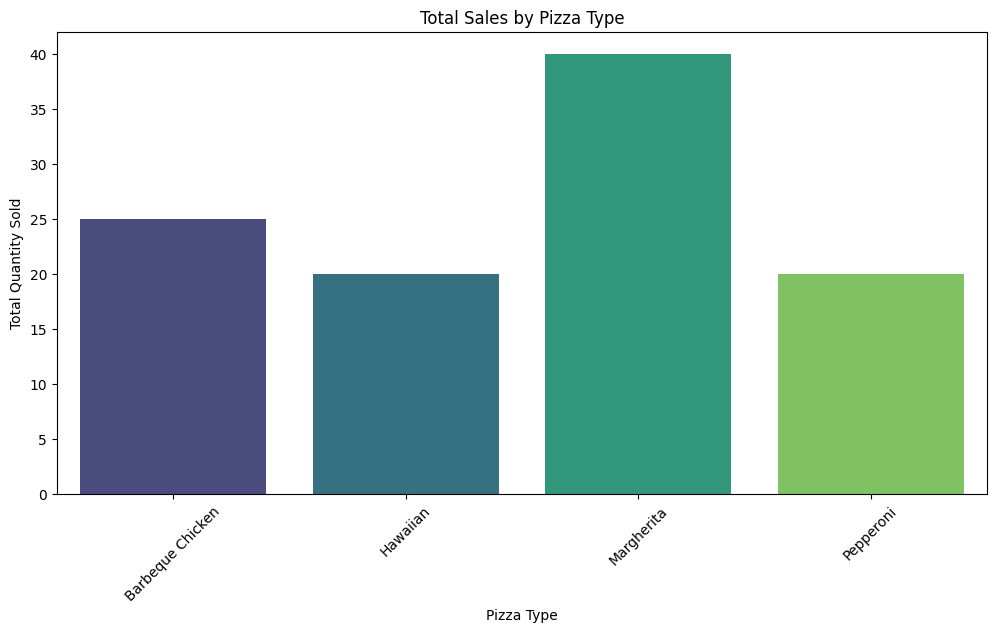

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sales data for demonstration
data = {
    'pizza_type': ['Margherita', 'Pepperoni', 'Hawaiian', 'Barbeque Chicken', 'Margherita', 'Pepperoni'],
    'quantity_sold': [10, 15, 20, 25, 30, 5]
}
sales_data = pd.DataFrame(data)

# Analyze subsets of the data
# Example: Sales by pizza type
sales_by_type = sales_data.groupby('pizza_type')['quantity_sold'].sum().reset_index()

# Plotting the sales by pizza type
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_type, x='pizza_type', y='quantity_sold', palette='viridis')
plt.title('Total Sales by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()